In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Define dataset paths
#Dataset is divided and made into small dataset due to absence og GPU
train_dir = '/content/drive/MyDrive/images_small/train'
val_dir = '/content/drive/MyDrive/images_small/validation'
test_dir = '/content/drive/MyDrive/images_small/test'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=128,  # Increased batch size
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=128,  # Increased batch size
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=128,  # Increased batch size
    class_mode='categorical',
    shuffle=False
)

# Model architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate adjustment and checkpointing
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50,
    callbacks=[reduce_lr, checkpoint, early_stopping]
)

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation accuracy: {val_acc:.2f}')

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Save the final model
model.save('/content/emotion_detection_model.h5')

# Optional: Download the model to your local machine
from google.colab import files
files.download('/content/emotion_detection_model.h5')


Num GPUs Available:  0
Found 5385 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.
Found 380 images belonging to 7 classes.
Epoch 1/50
42/42 [==============================] - 1562s 37s/step - loss: 1.8354 - accuracy: 0.2389 - val_loss: 1.8620 - val_accuracy: 0.2578 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
42/42 [==============================] - 44s 1s/step - loss: 1.8136 - accuracy: 0.2509 - val_loss: 1.8184 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 42s 990ms/step - loss: 1.8023 - accuracy: 0.2568 - val_loss: 1.7931 - val_accuracy: 0.2607 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - 45s 1s/step - loss: 1.7832 - accuracy: 0.2564 - val_loss: 1.7677 - val_accuracy: 0.2720 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - 44s 1s/step - loss: 1.7475 - accuracy: 0.2882 - val_loss: 1.7011 - val_accuracy: 0.3288 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - 38s 901ms/step - loss: 1.6986 - accuracy: 0.3125 - val_loss: 1.6378 - val_accuracy: 0.3842 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - 44s 1s/step - loss: 1.6396 - accuracy: 0.3454 - val_loss: 1.5898 - val_accuracy: 0.3920 - lr: 0.0010
Epoch 8/50
42/42 [==============================] - 43s 1s/step - loss: 1.61

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

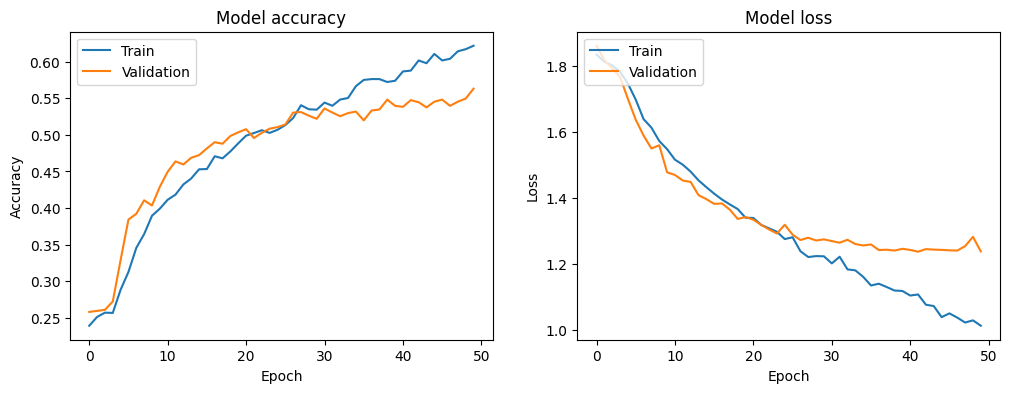

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Assuming 'history' is the variable containing the training history
plot_history(history)


In [ ]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')


12/12 [==============================] - 9s 680ms/step - loss: 1.2389 - accuracy: 0.5634
Validation Loss: 1.2389
Validation Accuracy: 0.5634


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

3/3 [==============================] - 2s 459ms/step - loss: 1.4382 - accuracy: 0.4947
Test Loss: 1.4382
Test Accuracy: 0.4947


3/3 [==============================] - 3s 697ms/step
Test Accuracy: 0.4947


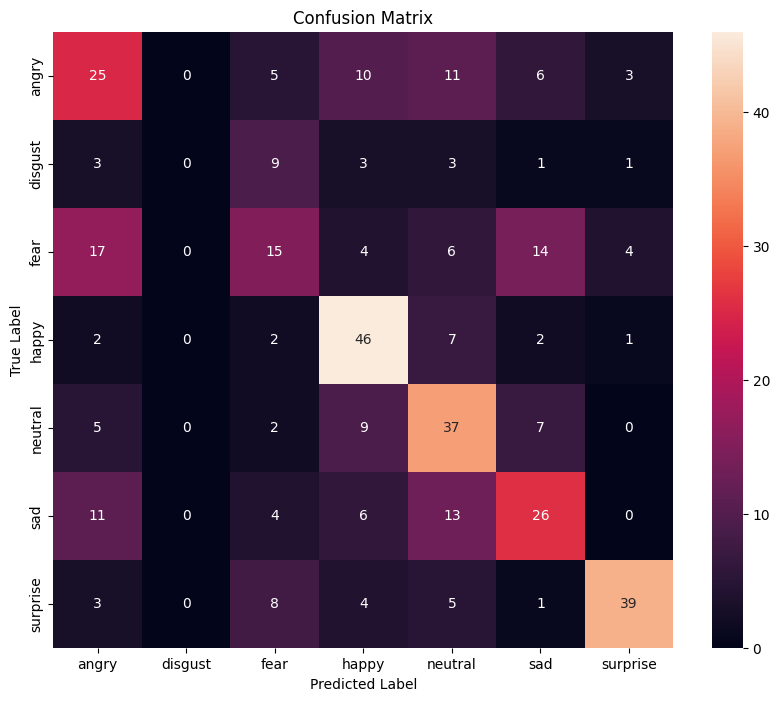

Classification Report:
               precision    recall  f1-score   support

       angry       0.38      0.42      0.40        60
     disgust       0.00      0.00      0.00        20
        fear       0.33      0.25      0.29        60
       happy       0.56      0.77      0.65        60
     neutral       0.45      0.62      0.52        60
         sad       0.46      0.43      0.44        60
    surprise       0.81      0.65      0.72        60

    accuracy                           0.49       380
   macro avg       0.43      0.45      0.43       380
weighted avg       0.47      0.49      0.48       380


Misclassified Examples:
Image 4: Predicted as happy, True label: angry
Image 6: Predicted as fear, True label: angry
Image 9: Predicted as happy, True label: angry
Image 11: Predicted as happy, True label: angry
Image 12: Predicted as neutral, True label: angry
Image 14: Predicted as neutral, True label: angry
Image 15: Predicted as happy, True label: angry
Image 16: Predicte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
